#  This Jupyter Notebook contains the codes of various Euler Bernoulli Beam simulations


## Constants definitions

In [14]:
L = 10; % length = 10 m
b = 0.1; % width = 10 cm
d = 0.05; % height = 5 cm
E = 2*10^11; % Young�s modulus for steel = 200 GPa = 2x10^11 Pa
I = b*d^3/12; % second moment of inertia
rho = 7850; % mass density of steel = 7850 kg/m^3
g = 9.81; % acceleration due to gravity = 9.81 m/s^2
w = rho*b*d*g; % weight of the beam per unit length (will be our f)
n = 8; % number of subintervals on [0, L]
h = L/n; % discretization spacing
N = n + 1; % number of unknowns to be solved for

% Define the RHS of the system
f = -h^4/(E*I) * w * ones(N, 1);
f(1) = f(N) = 0;

In [26]:
% Since in Sauer's second edition does not use a pentadiagonal matrix, we must use a more standard approach
% Filling and solving our matrix.
A = [];

A(1,2) = -9;
A(1,3) = (8/3);
A(1,4) = (-1/4);
A(n,n) = (72/17);
for i=1:n
    for j = 1:n
        if i == j && i > 1 && i <= n - 2
            A(i,j) = 6;
        endif
        % adding the first superdiagonal and subdiagonal
        if abs(i - j) == 1 && i > 1 && i <= n - 2
            A(i,j) = -4;
        endif
        % adding the second superdiagonal and subdiagonal
        if abs(i - j) == 2 && i > 1 && i <= n - 2
            A(i,j) = 1;
        endif
    endfor
endfor

A(n-1,n) = (-28/17);
A(n,n-1) = (-156/17);
A(n-1,n-1) = (72/12);
A

A =

   0.00000  -9.00000   2.66667  -0.25000   0.00000   0.00000   0.00000   0.00000
  -4.00000   6.00000  -4.00000   1.00000   0.00000   0.00000   0.00000   0.00000
   1.00000  -4.00000   6.00000  -4.00000   1.00000   0.00000   0.00000   0.00000
   0.00000   1.00000  -4.00000   6.00000  -4.00000   1.00000   0.00000   0.00000
   0.00000   0.00000   1.00000  -4.00000   6.00000  -4.00000   1.00000   0.00000
   0.00000   0.00000   0.00000   1.00000  -4.00000   6.00000  -4.00000   1.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -1.64706
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -9.17647   4.23529



## Both ends fixed

In [3]:
% Define the matrix of the system. Notation: d0 is the main diagonal;
% dpn is "main diagonal + n" (superdiagonal n); dmn is "main diagonal - n" (subdiagonal n)
d0 = 6*ones(1, N);
dp1 = dm1 = -4*ones(1, N-1);
dp2 = dm2 = ones(1, N-2);
% Fixed left end
d0(1) = 16.0; d0(2) = -9.0;
dp1(1) = -9.0;
dp2(1) = (4/3);
dm1(1) = -4.0;
dm2(1) = 1.0;

% Fixed right end
d0(N) = -12.0; d0(N-1) = 6.0;
dp1(N-1) = -4.0;
dp2(N-2) = 1.0;
dm1(N-1) = -6.0;
dm2(N-2) = (4/3);
% Solve for y
y = GaussElimPenta(dm2, dm1, d0, dp1, dp2, f);
% Plots
y
x = (0:h:L)';
y_exact = -b*d*rho*g/(24*E*I)*x.^2.*(L - x).^2;
ErrMax = max(abs(y-y_exact))

y =

   1.0764e-07
   5.1903e-08
  -9.4136e-07
  -2.8677e-06
  -5.7229e-06
  -9.5023e-06
  -1.4202e-05
  -1.9817e-05
  -2.6343e-05
  -3.3776e-05
  -4.2112e-05
  -5.1346e-05
  -6.1473e-05
  -7.2491e-05
  -8.4393e-05
  -9.7176e-05
  -1.1084e-04
  -1.2537e-04
  -1.4077e-04
  -1.5703e-04
  -1.7415e-04
  -1.9213e-04
  -2.1096e-04
  -2.3064e-04
  -2.5116e-04
  -2.7251e-04
  -2.9470e-04
  -3.1772e-04
  -3.4157e-04
  -3.6623e-04
  -3.9172e-04
  -4.1801e-04
  -4.4512e-04
  -4.7302e-04
  -5.0173e-04
  -5.3124e-04
  -5.6153e-04
  -5.9262e-04
  -6.2449e-04
  -6.5713e-04
  -6.9056e-04
  -7.2475e-04
  -7.5971e-04
  -7.9543e-04
  -8.3191e-04
  -8.6915e-04
  -9.0714e-04
  -9.4587e-04
  -9.8535e-04
  -1.0256e-03
  -1.0665e-03
  -1.1082e-03
  -1.1506e-03
  -1.1937e-03
  -1.2376e-03
  -1.2821e-03
  -1.3274e-03
  -1.3734e-03
  -1.4200e-03
  -1.4674e-03
  -1.5155e-03
  -1.5642e-03
  -1.6137e-03
  -1.6638e-03
  -1.7146e-03
  -1.7661e-03
  -1.8182e-03
  -1.8710e-03
  -1.9245e-03
  -1.9786e-03
  -2.0334e-03
 

  -4.7405e-02
  -4.7431e-02
  -4.7456e-02
  -4.7480e-02
  -4.7505e-02
  -4.7529e-02
  -4.7552e-02
  -4.7575e-02
  -4.7597e-02
  -4.7619e-02
  -4.7640e-02
  -4.7661e-02
  -4.7682e-02
  -4.7702e-02
  -4.7722e-02
  -4.7741e-02
  -4.7760e-02
  -4.7778e-02
  -4.7796e-02
  -4.7813e-02
  -4.7830e-02
  -4.7846e-02
  -4.7862e-02
  -4.7877e-02
  -4.7892e-02
  -4.7907e-02
  -4.7921e-02
  -4.7934e-02
  -4.7948e-02
  -4.7960e-02
  -4.7972e-02
  -4.7984e-02
  -4.7995e-02
  -4.8006e-02
  -4.8016e-02
  -4.8026e-02
  -4.8035e-02
  -4.8044e-02
  -4.8053e-02
  -4.8061e-02
  -4.8068e-02
  -4.8075e-02
  -4.8082e-02
  -4.8088e-02
  -4.8093e-02
  -4.8099e-02
  -4.8103e-02
  -4.8107e-02
  -4.8111e-02
  -4.8114e-02
  -4.8117e-02
  -4.8119e-02
  -4.8121e-02
  -4.8123e-02
  -4.8124e-02
  -4.8124e-02
  -4.8124e-02
  -4.8123e-02
  -4.8122e-02
  -4.8121e-02
  -4.8119e-02
  -4.8117e-02
  -4.8114e-02
  -4.8111e-02
  -4.8107e-02
  -4.8102e-02
  -4.8098e-02
  -4.8093e-02
  -4.8087e-02
  -4.8081e-02
  -4.8074e-02
  -4.8

  -4.7044e-03
  -4.6267e-03
  -4.5495e-03
  -4.4728e-03
  -4.3966e-03
  -4.3209e-03
  -4.2457e-03
  -4.1711e-03
  -4.0969e-03
  -4.0234e-03
  -3.9503e-03
  -3.8778e-03
  -3.8058e-03
  -3.7343e-03
  -3.6634e-03
  -3.5931e-03
  -3.5233e-03
  -3.4541e-03
  -3.3854e-03
  -3.3173e-03
  -3.2498e-03
  -3.1828e-03
  -3.1164e-03
  -3.0506e-03
  -2.9854e-03
  -2.9208e-03
  -2.8568e-03
  -2.7933e-03
  -2.7305e-03
  -2.6683e-03
  -2.6066e-03
  -2.5456e-03
  -2.4852e-03
  -2.4254e-03
  -2.3663e-03
  -2.3078e-03
  -2.2499e-03
  -2.1926e-03
  -2.1360e-03
  -2.0800e-03
  -2.0247e-03
  -1.9700e-03
  -1.9160e-03
  -1.8626e-03
  -1.8099e-03
  -1.7579e-03
  -1.7065e-03
  -1.6558e-03
  -1.6058e-03
  -1.5564e-03
  -1.5078e-03
  -1.4598e-03
  -1.4126e-03
  -1.3660e-03
  -1.3202e-03
  -1.2750e-03
  -1.2306e-03
  -1.1868e-03
  -1.1438e-03
  -1.1015e-03
  -1.0600e-03
  -1.0191e-03
  -9.7903e-04
  -9.3968e-04
  -9.0106e-04
  -8.6319e-04
  -8.2608e-04
  -7.8972e-04
  -7.5412e-04
  -7.1928e-04
  -6.8521e-04
  -6.5

## Left Fixed, Right Free

In [9]:
% TODO %

## Left Free, Right Pinned 

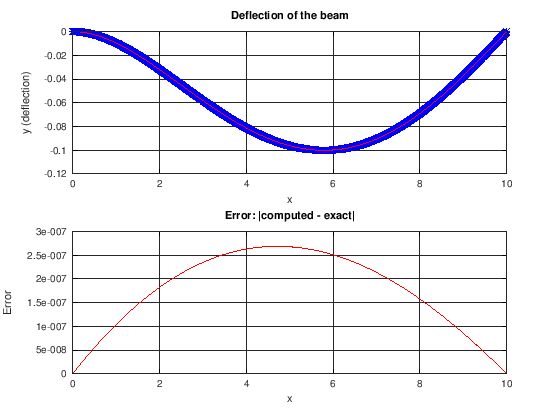

In [11]:
subplot(2,1,1);
plot(x, y, "b*", x, y_exact, "r")
title('Deflection of the beam');
xlabel('x'); ylabel('y (deflection)');
grid on;
subplot(2,1,2);
plot(x, abs(y - y_exact), "r")
title('Error: |computed - exact|');
xlabel('x'); ylabel('Error');
grid on;